In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('classic')
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os
import cv2
from PIL import Image
import numpy as np


In [9]:
image_directory =(r"C:\Users\oneda\offline\offline\\")
SIZE = 150
dataset = []  
label = []  

parasitized_images = os.listdir(image_directory + 'Disease\\')
for i, image_name in enumerate(parasitized_images):    # enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Disease\\' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

uninfected_images = os.listdir(image_directory + 'Healthy\\')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Healthy\\' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

#dataset = np.array(dataset)
x = np.array(dataset)
x=x/255
dataset=x
label = np.array(label)




In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.33, random_state = 0) #33 test 


import keras
import tensorflow as tf


INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.10))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))  


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             
              metrics=['accuracy'])

print(model.summary())    

history = model.fit(X_train, 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 200,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                        )



model.save(r"C:\Users\oneda\offline\model\offline.h5")  



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_8 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

5/5 [==============================] - 3s 565ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9091
Epoch 88/200
5/5 [==============================] - 3s 565ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4139 - val_accuracy: 0.9091
Epoch 89/200
5/5 [==============================] - 3s 566ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3679 - val_accuracy: 0.9242
Epoch 90/200
5/5 [==============================] - 3s 558ms/step - loss: 2.6003e-04 - accuracy: 1.0000 - val_loss: 0.4046 - val_accuracy: 0.9242
Epoch 91/200
5/5 [==============================] - 3s 569ms/step - loss: 7.2409e-05 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9091
Epoch 92/200
5/5 [==============================] - 3s 562ms/step - loss: 3.7913e-04 - accuracy: 1.0000 - val_loss: 0.3943 - val_accuracy: 0.9242
Epoch 93/200
5/5 [==============================] - 3s 569ms/step - loss: 8.9079e-05 - accuracy: 1.0000 - val_loss: 0.4509 - val_accuracy: 0.9242
Epo

5/5 [==============================] - 3s 566ms/step - loss: 8.0800e-09 - accuracy: 1.0000 - val_loss: 0.4066 - val_accuracy: 0.9242
Epoch 200/200
5/5 [==============================] - 3s 569ms/step - loss: 2.7453e-08 - accuracy: 1.0000 - val_loss: 0.4162 - val_accuracy: 0.9242


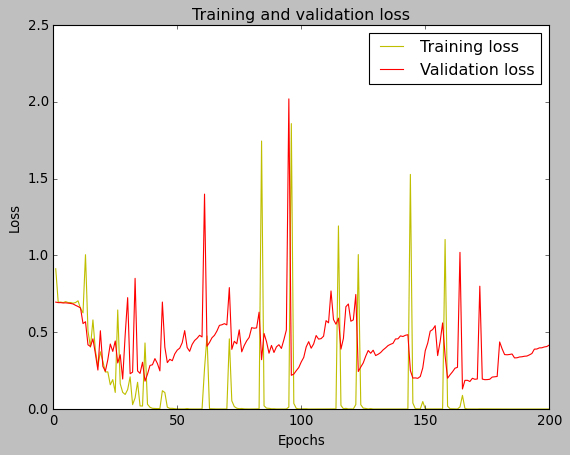

In [11]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






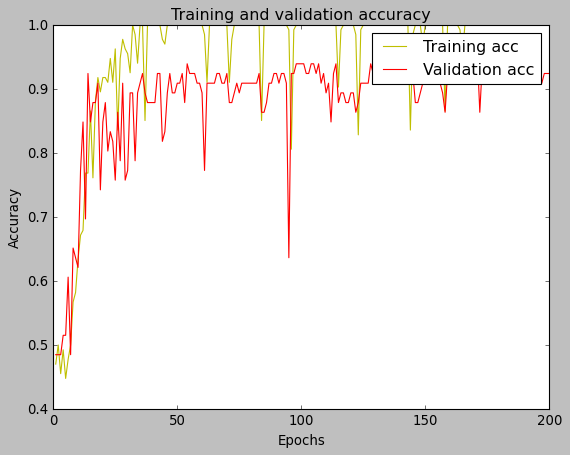

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:

from keras.models import load_model

model = load_model(r"C:\Users\oneda\offline\model\online.h5")




mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)
tp, fp, fn, tn = confusion_matrix(y_test, y_pred) .ravel()
print("tp, fp, fn, tn")
print(tp, fp, fn, tn)
acc=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", (acc * 100.0), "%")
Precision = tp / (tp + fp)
Precisio=Precision
print("Precision is" ,Precision)

specificity = tn/(tn+fp)
print("specificity is" ,specificity)
sensitivity = tp/(tp+fn)
print("sensitivity is" ,sensitivity)

recall = sensitivity
F1_Score = (2* recall*Precisio )/(recall + Precisio)
print("F1_Score  is" ,F1_Score)


[[29  3]
 [ 3 31]]
tp, fp, fn, tn
29 3 3 31
Accuracy =  90.9090909090909 %
Precision is 0.90625
specificity is 0.9117647058823529
sensitivity is 0.90625
F1_Score  is 0.90625
